In [1]:
# import library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# evaluation metrics
from sklearn.metrics import precision_score, make_scorer

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Polynomial feature
from sklearn.preprocessing import PolynomialFeatures

# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier, VotingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate


## **1. Load Dataset & Exploring**

In [2]:
base_dir = "E:\\Purwadhika\\Materi pagi\\Dataset\\"
path = base_dir + "data_telco_customer_churn.csv"
df = pd.read_csv(path)
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [4]:
df["Churn"].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

In [5]:
3614 * (65-20)

162630

In [6]:

1316 * (20+65)

111860

In [7]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.733063
Yes    0.266937
Name: proportion, dtype: float64

In [8]:
numerical_cols = df.select_dtypes(include="number").columns
numerical_cols

Index(['tenure', 'MonthlyCharges'], dtype='object')

In [9]:
category_cols = df.drop(columns="Churn").select_dtypes(exclude="number").columns
category_cols

Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')

In [10]:
df.duplicated().sum()

np.int64(77)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

In [13]:
df.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


In [14]:
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [15]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32676\372009398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


## **2. EDA**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32676\2796940671.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32676\2796940671.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


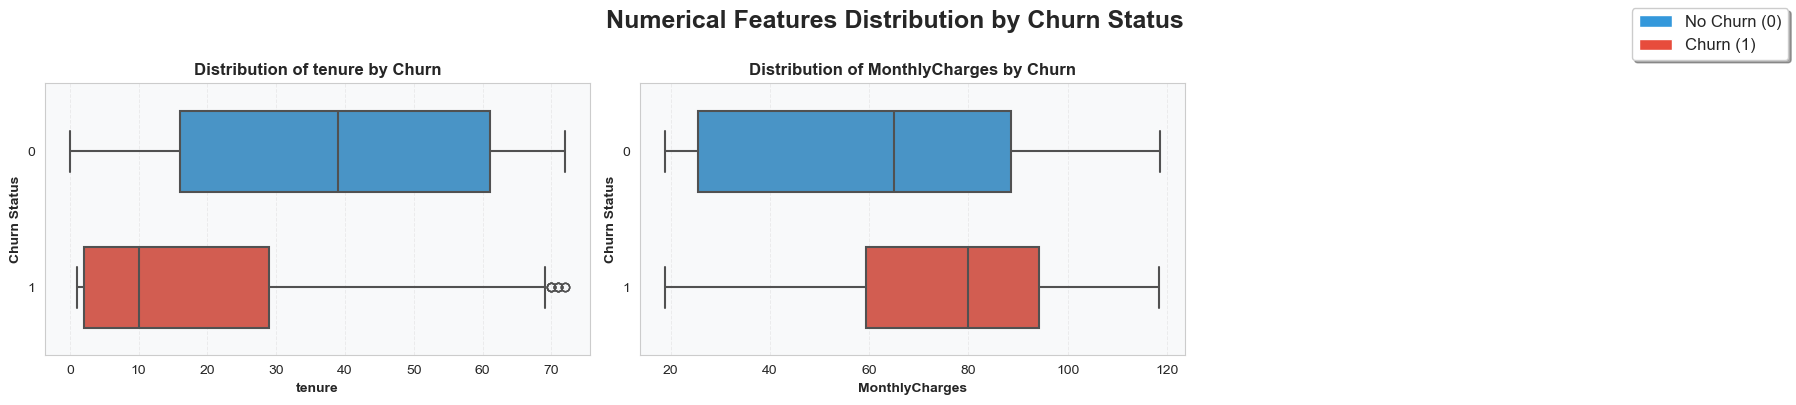

STATISTICAL COMPARISON: CHURN vs NO CHURN

tenure:
------------------------------------------------------------
No Churn     | Mean:    37.97 | Median:    39.00 | Std:    23.87
Churn        | Mean:    18.03 | Median:    10.00 | Std:    19.33

MonthlyCharges:
------------------------------------------------------------
No Churn     | Mean:    61.84 | Median:    64.95 | Std:    30.82
Churn        | Mean:    74.95 | Median:    80.00 | Std:    24.22



In [16]:
# Ambil kolom numerik tanpa 'Churn'
numerical_cols = df.drop(columns="Churn").select_dtypes(include="number").columns

# Hitung jumlah kolom untuk subplot
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # 3 kolom per baris

# Set style untuk tampilan yang lebih baik
sns.set_style("whitegrid")

# Buat figure dengan ukuran yang sesuai
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))
axes = axes.flatten()  # Ubah menjadi 1D array untuk memudahkan iterasi

# Pilih palette warna yang menarik
# Opsi: 'coolwarm', 'RdYlBu_r', 'Set2', 'husl', 'Spectral'
color_palette = ['#3498db', '#e74c3c']  # Blue untuk No Churn, Red untuk Churn

# Buat boxplot horizontal untuk setiap kolom numerik dengan hue Churn
for i, col in enumerate(numerical_cols):
    sns.boxplot(
        data=df, 
        x=col, 
        y='Churn', 
        ax=axes[i], 
        palette=color_palette,
        width=0.6,
        orient='h',
        linewidth=1.5
    )
    
    # Styling
    axes[i].set_title(f'Distribution of {col} by Churn', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Churn Status', fontsize=10, fontweight='bold')
    axes[i].grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
    
    # Set background color
    axes[i].set_facecolor('#f8f9fa')
    
    # Tambahkan informasi statistik
    for churn_val in df['Churn'].unique():
        median_val = df[df['Churn'] == churn_val][col].median()
        # Note: tidak menambahkan axvline karena bisa terlalu ramai

# Sembunyikan axes yang tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Main title
plt.suptitle('Numerical Features Distribution by Churn Status', 
             fontsize=18, fontweight='bold', y=1.00)

# Tambahkan legend global
# Create custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_palette[0], label='No Churn (0)'),
    Patch(facecolor=color_palette[1], label='Churn (1)')
]
fig.legend(handles=legend_elements, loc='upper right', fontsize=12, 
           frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

# Tampilkan statistik perbandingan
print("="*80)
print("STATISTICAL COMPARISON: CHURN vs NO CHURN")
print("="*80)

for col in numerical_cols:
    print(f"\n{col}:")
    print("-" * 60)
    for churn_val in sorted(df['Churn'].unique()):
        churn_label = "No Churn" if churn_val == 0 else "Churn"
        data_subset = df[df['Churn'] == churn_val][col]
        print(f"{churn_label:12} | Mean: {data_subset.mean():8.2f} | Median: {data_subset.median():8.2f} | Std: {data_subset.std():8.2f}")

print("\n" + "="*80)

## **3. Define X dan y**

In [17]:
X = df.drop(columns="Churn")
y = df["Churn"]

display(X.head(),y.head())

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60


0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

## **4. Splitting**

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=0,
                                                 test_size=0.20,
                                                 stratify=y)

## **5. Preprocess**

In [19]:
df[category_cols].nunique()

Dependents          2
OnlineSecurity      3
OnlineBackup        3
InternetService     3
DeviceProtection    3
TechSupport         3
Contract            3
PaperlessBilling    2
dtype: int64

In [34]:
df["Dependents"].value_counts()

Dependents
No     3380
Yes    1473
Name: count, dtype: int64

In [35]:
df["OnlineSecurity"].value_counts()

OnlineSecurity
No                     2420
Yes                    1430
No internet service    1003
Name: count, dtype: int64

In [20]:
df[numerical_cols].nunique()

tenure              73
MonthlyCharges    1422
dtype: int64

In [21]:
preprocess_transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore",sparse_output=False),category_cols),
    ("robust", RobustScaler(),numerical_cols)
], remainder="passthrough")

preprocess_transformer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                ('robust', RobustScaler(),
                                 Index(['tenure', 'MonthlyCharges'], dtype='object'))])

In [22]:
preprocess_transformer.fit_transform(X_train)

,onehot__Dependents_Yes,onehot__OnlineSecurity_No internet service,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No internet service,onehot__OnlineBackup_Yes,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__DeviceProtection_No internet service,onehot__DeviceProtection_Yes,onehot__TechSupport_No internet service,onehot__TechSupport_Yes,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_Yes,robust__tenure,robust__MonthlyCharges
3788,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.808511,-0.398090
3348,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.893617,0.295552
2399,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.297872,-0.892687
261,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042553,0.375974
107,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.148936,0.268409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.276596,-1.024378
2397,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.234043,-0.420206
4469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.489362,-0.313647
1532,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.510638,0.188992


## **6. Model Selection**

In [23]:
# Voting dan Stacking
from sklearn.ensemble import VotingClassifier, StackingClassifier
# Bagging dan RF
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Ensemble Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost import XGBClassifier
# evaluation metrics
from sklearn.metrics import fbeta_score, make_scorer
# cross validation
from sklearn.model_selection import cross_val_score

In [24]:
# define algo
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)

# bagging
bagging = BaggingClassifier(random_state=0)

# random forest
rf = RandomForestClassifier(random_state=0)

#gradient boosting
adaboost = AdaBoostClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
xgboost = XGBClassifier(random_state=0)

list_model = [logreg, knn, tree, bagging, 
              rf, adaboost, gboost, xgboost]

In [25]:
f2_scorer = make_scorer(fbeta_score, beta=2)

In [26]:
# Cross Validation
cv_all = []
cv_mean = []
cv_std = []

for model in list_model:
    pipe_model = Pipeline([
        ("preprocessing", preprocess_transformer),
        ("modeling", model)
    ])

    model_cv = cross_val_score(
        estimator=pipe_model,
        X= X_train,
        y = y_train,
        cv = 5,
        scoring = f2_scorer
    )

    cv_all.append(model_cv.round(4))
    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())

In [27]:
df_cv = pd.DataFrame()
df_cv["model"] = list_model
df_cv["f2_all"] = cv_all
df_cv["f2_mean"] = cv_mean
df_cv["f2_std"] = cv_std

df_cv.sort_values(["f2_mean", "f2_std"], 
                  ascending=[False, True])

,model,f2_all,f2_mean,f2_std
0,LogisticRegression(random_state=0),"[0.5377, 0.5155, 0.5366, 0.585, 0.5016]",0.535273,0.028312
7,"XGBClassifier(base_score=None, booster=None, c...","[0.5279, 0.5184, 0.5193, 0.5767, 0.5308]",0.534638,0.021585
6,GradientBoostingClassifier(random_state=0),"[0.5422, 0.5461, 0.5348, 0.5346, 0.4574]",0.523022,0.033097
1,KNeighborsClassifier(),"[0.51, 0.499, 0.496, 0.4892, 0.468]",0.492435,0.013960
2,DecisionTreeClassifier(random_state=0),"[0.5294, 0.4985, 0.4333, 0.4927, 0.4928]",0.489342,0.031144
4,RandomForestClassifier(random_state=0),"[0.4847, 0.5015, 0.4632, 0.4908, 0.4888]",0.485810,0.012579
5,AdaBoostClassifier(random_state=0),"[0.4802, 0.502, 0.4635, 0.4953, 0.4382]",0.475854,0.023020
3,BaggingClassifier(random_state=0),"[0.4752, 0.4853, 0.4596, 0.4852, 0.4475]",0.470560,0.014889


In [36]:
pipe_base = Pipeline([
    ("preprocessing", preprocess_transformer),
    ("model", XGBClassifier(random_state=0))
])

pipe_base

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('robust', RobustScaler(),
                                                  Ind...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [37]:
pipe_base.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('robust', RobustScaler(),
                                                  Ind...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [38]:
y_train_base = pipe_base.predict(X_train)
y_test_base = pipe_base.predict(X_test)

precision_train_base = fbeta_score(y_train,y_train_base, beta=2)
precision_test_base = fbeta_score(y_test,y_test_base, beta=2)


print(f"PRECISION TRAIN (BASE MODEL): {precision_train_base}")
print(f"PRECISION TEST (BASE MODEL): {precision_test_base}")

PRECISION TRAIN (BASE MODEL): 0.8221608832807571
PRECISION TEST (BASE MODEL): 0.4813915857605178


In [39]:
(y==0).sum()

np.int64(3565)

In [40]:
(y==1).sum()

np.int64(1288)

In [41]:
3565/1288

2.767857142857143

In [42]:
# Defien parameter distribution
hyperparam = {
    "model__n_estimators": range(50, 100),
    "model__max_depth": range(3,12),
    "model__learning_rate": np.logspace(np.log10(0.01), np.log10(0.20)), # 0.01 - 0.20 (logaritmik)
    "model__scale_pos_weight": range(10, 40),
    "model__min_child_weight": range(1, 5),
    "model__max_delta_step": [1,3,5]
}
hyperparam

{'model__n_estimators': range(50, 100),
 'model__max_depth': range(3, 12),
 'model__learning_rate': array([0.01      , 0.01063045, 0.01130065, 0.01201309, 0.01277046,
        0.01357557, 0.01443144, 0.01534127, 0.01630846, 0.01733663,
        0.01842962, 0.01959151, 0.02082666, 0.02213967, 0.02353547,
        0.02501926, 0.0265966 , 0.02827338, 0.03005588, 0.03195075,
        0.03396508, 0.03610641, 0.03838273, 0.04080257, 0.04337497,
        0.04610954, 0.04901652, 0.05210676, 0.05539183, 0.05888401,
        0.06259635, 0.06654273, 0.07073791, 0.07519758, 0.07993841,
        0.08497812, 0.09033557, 0.09603077, 0.10208502, 0.10852097,
        0.11536267, 0.12263571, 0.13036727, 0.13858627, 0.14732343,
        0.15661143, 0.166485  , 0.17698103, 0.1881388 , 0.2       ]),
 'model__scale_pos_weight': range(10, 40),
 'model__min_child_weight': range(1, 5),
 'model__max_delta_step': [1, 3, 5]}

In [43]:
pipe_model = Pipeline([
    ("preprocessing", preprocess_transformer),
    ("model", XGBClassifier(random_state=0))
])

pipe_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('robust', RobustScaler(),
                                                  Ind...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [44]:
randomsearch = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam, 
    random_state=0,
    cv=5,
    scoring= f2_scorer, 
    n_jobs= -1,
    n_iter= 50 #ambil 50 sample aja 
)
randomsearch

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='obje...
       0.11536267, 0.12263571, 0.13036727, 0.13858627, 0.14732343,
       0.15661143, 0.166485  , 0.17698103, 0.1881388 , 0.2       ]),
                                        'model__max_delta_step': [1, 3, 5],
                                        'model__max_depth': range(3, 12),
                                        'model__min_child_weight': range(1, 5),
                                        'model__n_estimators': range(50, 100),
                                        'model__scale_pos_weight': range(10, 40)},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [45]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='obje...
       0.11536267, 0.12263571, 0.13036727, 0.13858627, 0.14732343,
       0.15661143, 0.166485  , 0.17698103, 0.1881388 , 0.2       ]),
                                        'model__max_delta_step': [1, 3, 5],
                                        'model__max_depth': range(3, 12),
                                        'model__min_child_weight': range(1, 5),
                                        'model__n_estimators': range(50, 100),
                                        'model__scale_pos_weight': range(10, 40)},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [46]:
randomsearch.best_score_

np.float64(0.7446178681883284)

In [47]:
randomsearch.best_params_

{'model__scale_pos_weight': 12,
 'model__n_estimators': 60,
 'model__min_child_weight': 1,
 'model__max_depth': 7,
 'model__max_delta_step': 5,
 'model__learning_rate': np.float64(0.05539182980610754)}

In [48]:
pipe_tuned = randomsearch.best_estimator_
pipe_tuned

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('robust', RobustScaler(),
                                                  Ind...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.05539182980610754),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=5,
                               max_depth=7, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=60,
                               n_jobs=None, num_parallel_tree=None, ...))])